In [30]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

Investing in financial markets is a multifaceted endeavor influenced by a myriad of factors ranging from macroeconomic trends to micro-level market dynamics. For new investors, the challenge lies not only in understanding the intricacies of these factors but also in determining the most appropriate strategy to navigate them effectively. This project seeks to address this challenge by exploring various investment strategies and leveraging machine learning techniques to identify the optimal approach under different market conditions.

The first aspect of this project involves delving into the nuances of different investment strategies. Dollar Cost Averaging (DCA), for instance, entails investing a fixed amount of money at regular intervals regardless of market fluctuations. On the other hand, Lump Sum investing involves deploying a significant amount of capital into the market at once. Additionally, timing lump sum investments through moving average analysis, dollar-cost averaging proportionate to market overextension, and identifying crossover points between moving averages represent alternative strategies that cater to specific market conditions and investor preferences.

Next, we aim to construct a comprehensive dataset comprising historical market data, including price movements, volatility indices, moving average trends, and other relevant features. This dataset will serve as the foundation for training our machine learning models. By incorporating a diverse range of features, we aim to capture the complex interplay between various market factors and investment outcomes, enabling our models to make informed predictions.

The core of our approach lies in formulating the investment strategy recommendation problem as a classification regression task using contextual multiarmed bandits with epsilon decay. In this setup, each data point represents a specific set of market conditions, and the corresponding label indicates the optimal investment strategy under those conditions. The bandit is comprised of a logistic regression that is continuously fit to data as rounds progress. The power of using a contextual bandit lies in the "arm pulling", which is, the balance of exploring versus exploiting certain strategies to try to get the best reward.By training our machine learning models on this labeled dataset, we aim to develop a predictive model capable of generalizing across different market scenarios and providing actionable recommendations to new investors.

In summary, this project aims to bridge the gap between theory and practice in investment decision-making by leveraging the power of machine learning. By systematically exploring different investment strategies and developing predictive models tailored to prevailing market conditions, we aim to empower new investors with the knowledge and tools necessary to navigate financial markets confidently and achieve their investment goals.


## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Jason:

This project is particularly meaningful for me as a beginner investor seeking to navigate the complexities of the financial markets. By delving into the application of machine learning techniques, I aim to gain practical insights into understanding current market conditions and optimizing my investment strategy accordingly. This hands-on experience provides a valuable opportunity for me to learn how to interpret market data effectively and make informed decisions.

Costanza:

Although my interests are not as based in finance as Jason, I have been interested in applying my knowledge of decision models to more real-world applications for a while. I think it's important for me to start thinking about realistic investments for when I start (hopefully) receiving a more consisten salary post-grad. 

Jason and Costanza:

Moreover, this endeavor isn't just about personal growth; it directly addresses the needs of beginner investors like ourselves who are seeking guidance in understanding the intricacies of the market. By utilizing machine learning to analyze historical market data, this project offers a practical framework for evaluating investment opportunities and managing risks. Through this process, we hope to develop a more nuanced understanding of investment strategies that will serve us well as we continue to navigate the financial landscape.

In essence, this project is about empowering beginner investors to make smarter decisions by leveraging data-driven insights. It's a practical journey that not only enhances our own understanding but also has the potential to benefit others who are embarking on their investment journey.

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



YOUR ANSWER HERE

1. **Data Acquisition and Preprocessing**: (Jason)
   - We'll leverage the `yahoo_fin` package to fetch historical market data such as stock prices, volatility indices, and other relevant metrics.
   - Python's `datetime` module will be used to handle date-related operations for time-series analysis.
   - Feature engineering will involve extracting meaningful features from raw market data. This includes moving averages, volatility, momentum and other technical indicators.
   - Truncated Singular Value Decomposition (Truncated SVD) from the `sklearn.decomposition` module were employed to reduce dimensionality and extract essential features.

2. **Machine Learning Models**: (Jason)
   - We'll utilize various machine learning algorithms (specifically RandomForestClassifier) from the `sklearn.ensemble` module, to train our predictive models.
   - To handle potential class imbalance and improve model generalization, techniques like oversampling, undersampling, or using class weights will be considered during model training.
   - We'll employ techniques such as cross-validation and train-test splits using `sklearn.model_selection.train_test_split` to evaluate model performance.
   - Metrics such as accuracy, precision, recall, F1-score, and ROC-AUC will be used to assess model effectiveness and robustness.
   - Classification reports generated using `sklearn.metrics.classification_report` will provide detailed insights into model performance across different classes.
   - By integrating these numerical and computational methods, we aim to develop a robust framework capable of analyzing market dynamics, identifying optimal investment strategies, and providing actionable recommendations for new investors to navigate financial markets successfully.
   - Support Vector Classifiers were also explored, but did not predict results successfully, so they are not included here (Costanza)

3. **Backtesting and Performance Analysis**: (Jason)
   - Historical market data will be utilized for backtesting our recommended strategies to evaluate their efficacy and profitability.
   - We'll assess investment value over time over the different strategies to determine the optimal strategy given current market conditions
   - ELBO analysis will determine whether there is predictive power in the features (Costanza)

4. **Contextual Bandit***: (Costanza)
   - The next component of our project is to find a selection algorithm that decides between the strategies described above to maximize portfolios returns. Our $y$ variable for this portion of the project was whether or not the selected strategy was in fact the best strategy, so we are predicting which strategy will be most useful in a given scenario given market conditions for a given ticker.

   - Contextual bandits work by balancing the concepts of exploitation and exploration. Exploitation means that the bandit simply selects the strategy that is most likely to perform best. In our case, this is done by iterativey training logistic regressions for each arm and using the result as a probability. Thus, in theory, the maximum probability returned across the strategies is the strategy most likely to return as the best strategy for the given scenario. Exploration is done to avoid falling into local minima from the exploitation. This contextual bandit does this in two ways. The first is a standard practice among bandits, where the first few rounds, the bandit will "pull" each arm (in our case, each strategy) once to explore what the possibilities look like. 
   - Our contextual bandit also uses a decaying epsilon strategy to use some level of randomness to explore other arms. The epsilon value sets a certain limit to how much we'd like to explore versus exploit. Each orund, a random draw is taken and, if the number is lower than the epsilon value, the bandit will randomly pull an arm instead of exploring the arm that returns the highest probability. 
   - Our bandit also implements epsilon decay, which makes the epsilon value smaller and smaller as the bandit is trained. So, in theory, the bandit will grow more confident about which arm will give the best reward, so it is less necessary to explore other strategies. The values selected below were chosen as they are relatively standard values that worked for our implementation.
   - Each logistic regression in the bandit is trained on the time since the training/testing start date, clossing value, moving average, volatility, and momentum. Data is fed into the bandit in batches of 50, as that seemed to work well for us and any lower or higher made strategy calculations difficult and yielded unsubstantial or interpretable results. Note that fits are made on everything but the last datapoint of the batch, and the outcomes are recorded using that last datapoint to avoid data leakage. 
   - Testing simply exploits the bandit's fitted logistic regressions without updating them to return the bandit's decisions and successes (calculated post-hoc). 


In [31]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah


#!pip install yahoo_fin

import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

YOUR ANSWER HERE

### DOWNLOADING DATA:

This section retrieves historical market data for major indices such as the Dow Jones Industrial Average, the S&P 500, and the NASDAQ Composite. It loops through each index, fetches its data using the `get_data` function, and stores it in a dictionary. If data retrieval fails for any index, it prints an error message. Finally, it assigns the historical data for the NASDAQ Composite index to the variable `sandp_time`.

In [32]:
#PAST DJIA
custom_tickers = [
    "^DJI",    # Dow Jones Industrial Average (DJI)
    "^GSPC",   # S&P 500
    "^IXIC",   # NASDAQ Composite
]

# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")
        
sandp_time = stock_data["^IXIC"]

 ### FRAMEWORK - Dollar Cost Averaging Strategies:

1. **Original DCA Strategy**:
   - Invests a fixed amount of money at regular intervals, regardless of market conditions.
   - Aims to reduce the impact of market volatility by spreading investments over time.

2. **DCA with Complete Rollover Strategy**:
   - Rolls over the entire investment amount at each interval only if certain market conditions are met, typically related to trendline analysis.
   - Capitalizes on favorable market conditions while minimizing exposure during unfavorable periods.

3. **DCA with Risk-Based Rollover Strategy**:
   - Combines elements of the original DCA approach with risk management techniques.
   - Adjusts the investment amount at each interval based on the deviation of market conditions from a predefined risk threshold.
   - Aims to adapt to changing market conditions by adjusting investment levels based on perceived risk.


### DCA_ANALYSIS - Function Description

This function, `dca_analysis`, aims to analyze different investment strategies using historical market data. Here's a conceptual explanation of the implemented strategies:

1. **Lump Sum Strategy:**
    - In this strategy, the entire investment amount is invested upfront at the beginning of the testing period.
    - The total investment amount is divided by the initial closing price to determine the number of shares bought at once.
    - The portfolio value is then calculated over time without making additional investments.


2. **Lump Sum with Delay Strategy:**
    - This strategy involves waiting for a specific condition before investing the entire amount lump sum. In this case, the 200-day moving average must be increasing for a 6-day period consecutively to invest a lump-sum.
    - Once the condition is met, the entire investment amount is deployed, and the portfolio value is tracked over time.
    - No additional investments are made after the initial lump sum investment.


3. **Dollar Cost Averaging (DCA) Strategy:**
    - In the DCA strategy, equal amounts of money are regularly invested over fixed time intervals.
    - Investments are made regardless of market conditions, aiming to average out the purchase price over time.
    - The portfolio value is tracked over time based on the cumulative investments made at each interval.

Each strategy's performance is evaluated by comparing the final portfolio values.

In [33]:
random.seed(43)
np.random.seed(43)

global lumpy_date #set global variable to track lump_sum date
lumpy_date = None

def dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, days_val):
    sandp_time.index = pd.to_datetime(sandp_time.index)

    # The entire investment amount is invested upfront at the beginning of the testing period.
    def lump_sum_strategy(df, initial_investment, interval, moving_averages_df):
        
        #Lump-sum strategy - invest it all at once
        total_investment = len(range(interval, len(df), interval)) * initial_investment #Calculate total needed over period
        initial_price = df['close'].iloc[0]              # First available closing price at testing start
        shares_owned = total_investment / initial_price  # Total shares bought at once
        
        #Calculates investment value over time
        portfolio_value = []
        dates = []
        investment_history = []
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            current_value = shares_owned * current_price #Value is calculated based on current price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(0)  # No additional investment made

        #Returns portfolio value (shares*price), investment history (when we invested)
        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)
    
    # Waiting for a specific condition before investing the entire amount lump sum. 
    # For our example, the 200-day moving average must be increasing for a 
    # 30-day period consecutively to invest a lump-sum.
    def lump_sum_with_delay_strategy(df, initial_investment, interval, moving_averages_df):
        global lumpy_date
        initial_in = len(range(interval, len(df), interval)) * initial_investment #lump-sum amount
        total_investment = 0
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        
        #Lump-Sum with Delay variables
        lump_sum_invested = False                  # Whether we have lump-summed yet
        ma_slope = np.gradient(moving_averages_df) # Moving-average slope
        weeks = 0                                   # Number of weeks we are consecutively increasing
        
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']

            # If we have reached the end of the period, lump-sum it all in
            if i >= len(df)-interval and not lump_sum_invested:
                shares_bought = initial_in / current_price
                shares_owned += shares_bought
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(total_investment)
                lump_sum_invested = True
                weeks = 0
                lumpy_date = df.index[i]
            
            # If we have not reached end of the period yet
            if not lump_sum_invested:      
                # If the current 200-day moving average slope is greater than our threshhold
                # AND we have gone more than 6 weeks consecutively with increase moving average
                if ((ma_slope[i] > 0) and weeks >= weeks_val):
                    shares_bought = initial_in / current_price
                    shares_owned += shares_bought
                    current_value = shares_owned * current_price
                    portfolio_value.append(current_value)
                    dates.append(df.index[i])
                    investment_history.append(total_investment)
                    lump_sum_invested = True   #Set lump_sum invested equal to true
                    weeks = 0
                    lumpy_date = df.index[i]
                    
                # If we are not at 6 consecutive weeks
                else:
                    if (ma_slope[i] > 0): # If moving average is increasing, increment consecutive weeks
                        weeks += 1
                    else: # Otherwise, set equal to 0
                        weeks = 0
                    total_investment = 0
                    
            # If we have already lump-summed, set investment equal to 0
            else:
                total_investment = 0

            shares_bought = total_investment / current_price if total_investment > 0 else 0
            shares_owned += shares_bought
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(total_investment)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    # In the DCA strategy, equal amounts of money are regularly invested over fixed time intervals.
    def dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price #Simply divide constant investment amount by price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

    
    # Calculate moving averages for the testing dataset
    testing_df = sandp_time[start_date:end_date]
    full_set = sandp_time#[training_start_date:testing_end_date]
    moving_averages_test = full_set['close'].rolling(window=moving_average_window).mean()[start_date:end_date]
    
    # Calculate the investment strategy results on the testing dataset
    lump_sum_result = lump_sum_strategy(testing_df, initial_investment, time_interval, moving_averages_test)
    dca_result = dca_strategy(testing_df, initial_investment, time_interval)
    lump_sum_with_delay_result = lump_sum_with_delay_strategy(testing_df, initial_investment, time_interval, moving_averages_test)
    
    # Plotting
    if show_graph:
        
        # Plot Stock Price and Moving Average
        plt.figure(figsize=(14, 8))
        plt.plot(testing_df.index, testing_df['close'], label='S&P Close', color='blue')
        plt.plot(testing_df.index, moving_averages_test, label='Moving Average', color='red')
        for date in lump_sum_with_delay_result.index[lump_sum_with_delay_result['investment_history'] > 0]:
            plt.axvline(x=date, color='purple', linestyle='--', linewidth=0.5, label='Investment Dates' if 'Investment Dates' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.axvline(x=lumpy_date, color='orange', linestyle='--', linewidth=0.5, label='Lump Sum Date')
        plt.title('S&P Close and Moving Average Over Time')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        # Plot Strategy Performance
        fig, ax1 = plt.subplots(figsize=(14, 8))
        ax1.bar(lump_sum_with_delay_result.index.strftime('%Y-%m-%d'), lump_sum_with_delay_result['investment_history'], color='orange', label='Individual Investments')
        ax2 = ax1.twinx()
        ax2.plot(lump_sum_with_delay_result.index.strftime('%Y-%m-%d'), lump_sum_with_delay_result['portfolio_value'], label='Lump Sum w/ Delay Portfolio Value', color='blue')
        ax2.plot(dca_result.index.strftime('%Y-%m-%d'), dca_result['portfolio_value'], label='DCA Portfolio Value', color='red')
        ax2.plot(lump_sum_result.index.strftime('%Y-%m-%d'), lump_sum_result['portfolio_value'], label='Lump Sum Portfolio Value', color='black')
        ax1.set_title('Portfolio Value and Individual Investments Over Time')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Individual Investments')
        ax2.set_ylabel('Portfolio Value')
        ax1.xaxis.set_tick_params(rotation=45)
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper center')
        tick_frequency = 10
        ax1.xaxis.set_ticks(lump_sum_with_delay_result.index.strftime('%Y-%m-%d')[::tick_frequency])
        plt.show()

    lump_sum_with_delay_value = lump_sum_with_delay_result["portfolio_value"][-1]
    dca_value = dca_result["portfolio_value"][-1]
    lump_sum_value = lump_sum_result["portfolio_value"][-1]
    return [lump_sum_with_delay_value, dca_value, lump_sum_value,lumpy_date]

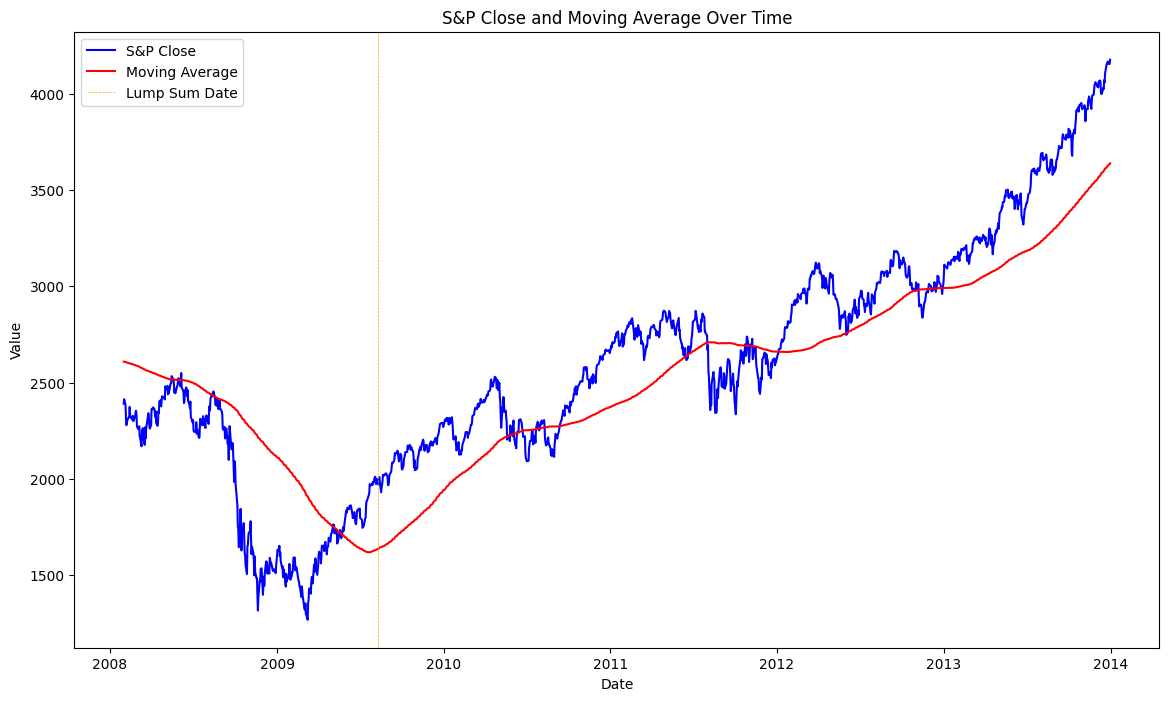

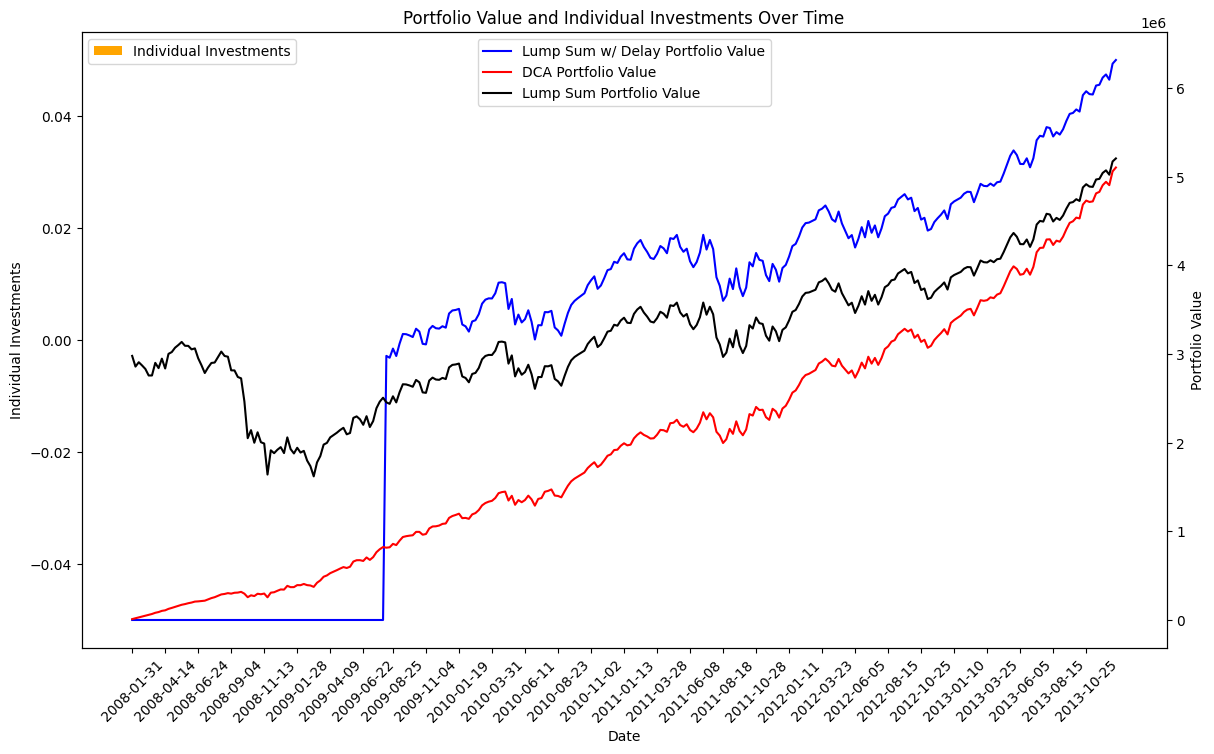

Lump Sum Result:  6318753.259476248
Original DCA Result:  5105466.18037538
Custom DCA Result:  5207935.684487286


In [34]:
#Example where Lump-Sum with Delay is the most optimal investment strategy
moving_average_window = 200 #200-day moving average
time_interval = 5           #5 days per period
start_date = '2008-01-31'
end_date = '2014-01-01'
initial_investment = 10000
show_graph = True
weeks_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, weeks_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

# The first graph illustrates S&P 500 closing prices alongside a 200-day moving average
# The second graph presents the new portfolio value of the 3 investment strategies.

### Result - Optimal Lump Sum with Delay:
- The Lump Sum with Delay strategy yielded the highest final portfolio value. In this case, since the moving average was decreasing at the start of the period, it was advantageous to wait to invest until the index was cheaper
- Original DCA resulted in a lower final value compared to Lump Sum, indicating that investing all at once was advantageous over time.

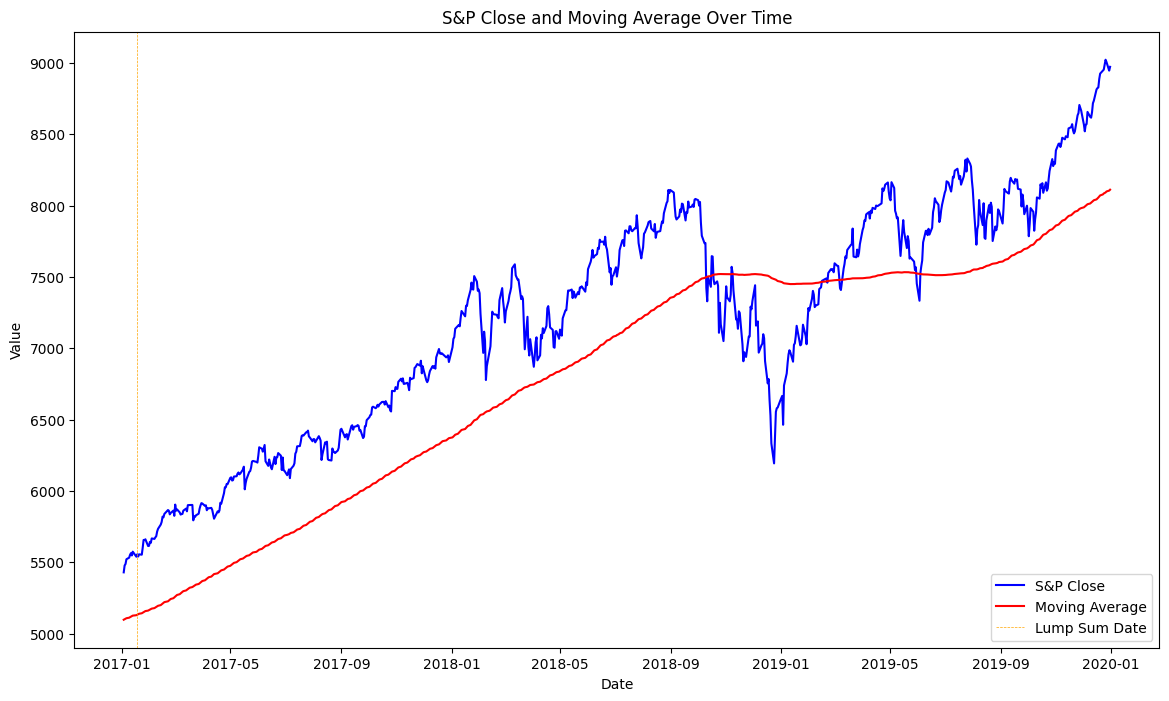

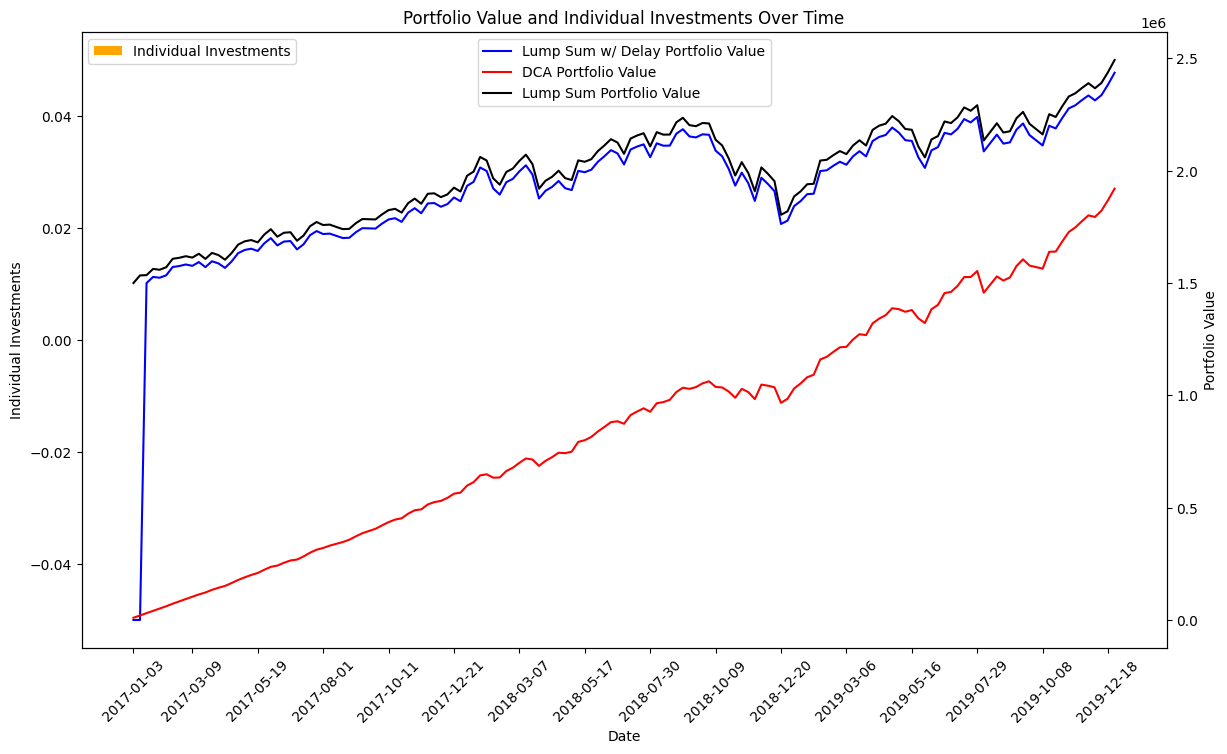

Lump Sum Result:  2436003.8358332957
Original DCA Result:  1920156.87957976
Custom DCA Result:  2492795.147226902


In [35]:
#Example where lump-sum at the start is better

moving_average_window = 200
time_interval = 5
start_date = '2016-12-31'
end_date = '2020-01-01'
initial_investment = 10000
show_graph = True
weeks_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, weeks_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

### Result - Optimal Lump Sum::
- The Lump Sum strategy yielded the highest final portfolio value. Since the market was broadly increasing over time and at the start of the period, Lump Sum at the beginning of the period yielded the best results.
- Lump Sum performed better than Lump Sum with Delay because the delay strategy waited 30 days before making the investment, and with a rising market, was lower in value slightly because of it.

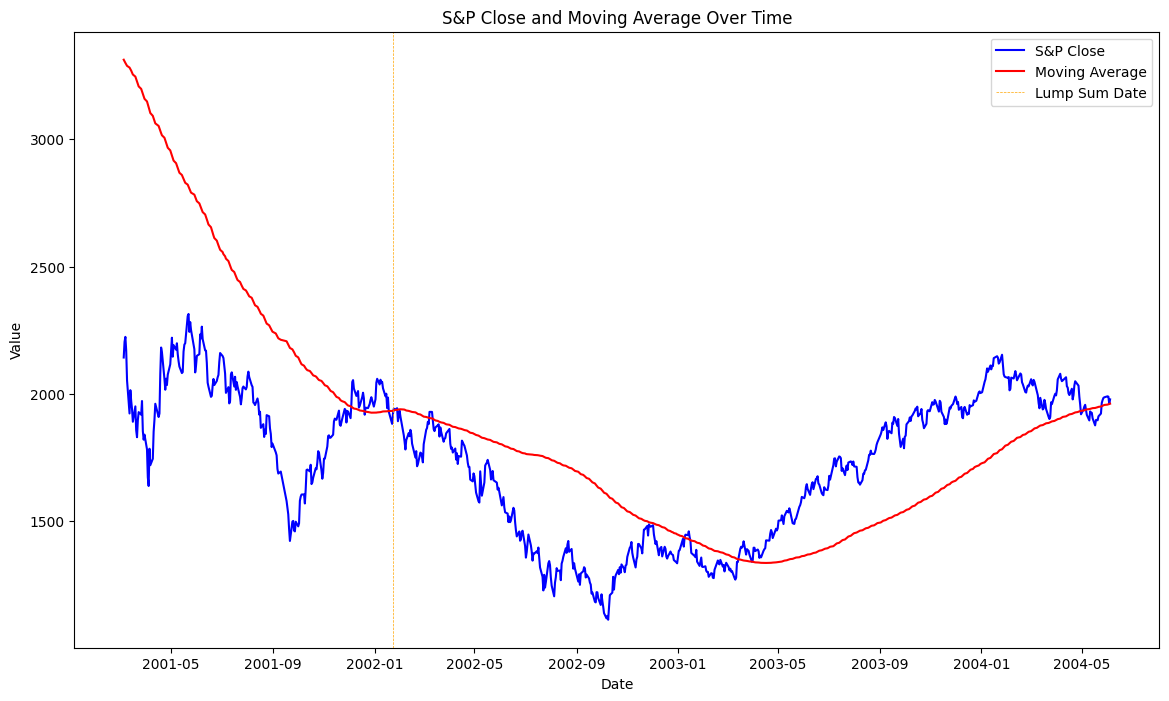

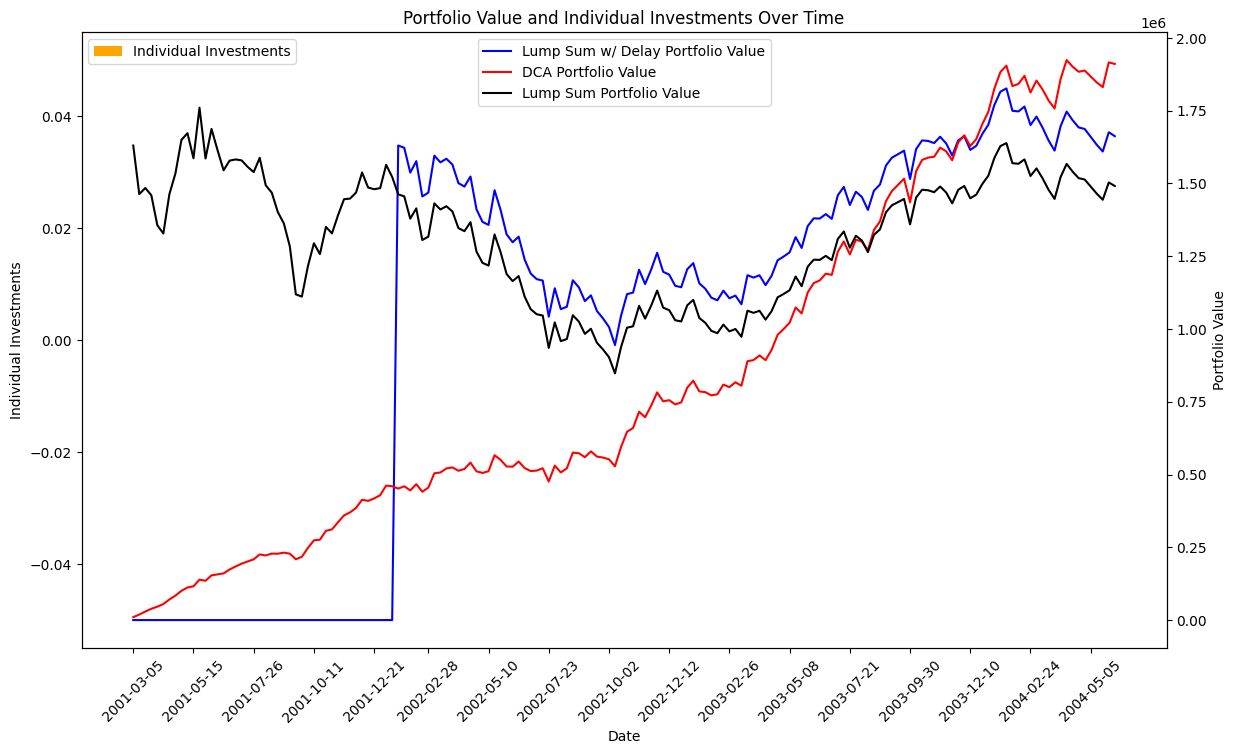

Lump Sum Result:  1662118.7318855557
Original DCA Result:  1910280.079595603
Custom DCA Result:  1491060.7640075649


In [36]:
#Example where DCA is better

moving_average_window = 200
time_interval = 5
start_date = '2001-03-03'
end_date = '2004-06-06'
initial_investment = 10000
show_graph = True
weeks_val = 2

result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, weeks_val)
print("Lump Sum Result: ", result[0])
print("Original DCA Result: ", result[1])
print("Custom DCA Result: ", result[2])

### Result - Optimal DCA:
- The DCA strategy yielded the highest final portfolio value. Since the market was generally stagnant over the period (beginning and ending at the same point), DCA over time was useful in this time of market uncertainty.
- Both lump sum strategies were unable to have a clear indicator of whether the market was moving up or down, giving them less of an edge to DCA.

### MODEL TRAINING - Different Periods

Now that we have defined the three strategies, we now want to train ML models to identify whether we can identify the market conditions that lead to a certain strategy being better. This necessitates us to define 3 different periods:

1. **Preceding Period (Training)**
    - The period that we use to train the model on. It is the market conditions that lead us up to our decision point. The last day of the preceding period is essentially "yesterday" - it is all the data we would like to look at that is available to us during our decision period.
    
    
2. **Decision Period (Testing)**
    - The period we looked at previously, as it is the time during which we make our decision to Lump Sum, Lump Sum with Delay, or DCA. This is essentially "today", as each day we must decide what strategy to choose. 
    
    
3. **Future Period (not important to the model)**
    - The period after the Decision period. This is essentially "the future", as we have already made our decision, and would just like to see the market conditions after the period where we made our decision.

In [37]:
random.seed(43)
np.random.seed(43)

# Defines parameters such as training and testing periods, moving average window, 
# time interval, initial investment, and visualization preferences.

train_years = 2             # Train the model on 2 years of "historical" data (Preceding Period)
test_years = 2              # Test the model on 2 years of "current" data (Decision Period)

moving_average_window = 150 # 150 day moving average
time_interval = 5           # 5-day (i.e. 1 week) average of prices
initial_investment = 10000
show_graph = False
weeks_val = 6                # For lump-sum with delay, must have 6 consecutive weeks of price increases to invest


# Randomly selects unique start dates within the available data range.
# n=2000 different decision periods
start_dates = np.random.choice(sandp_time.loc['1972-01-01':'2024-04-26'].index, size=2000, replace=False)
end_dates = [date + pd.DateOffset(months=int(test_years * 12)) for date in start_dates]

# Collect results
results = []
for start_date, end_date in zip(start_dates, end_dates):
    try:
        result = dca_analysis(sandp_time, moving_average_window, time_interval, start_date, end_date, initial_investment, show_graph, weeks_val)
        result_with_dates = result + [start_date, end_date]
        results.append(result_with_dates)
    except:
        pass

# Convert results into a DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Lump Sum with Delay', 'DCA', 'Lump Sum', 'Lump Sum Date','Start Date', 'End Date'])
results_df['Best Strategy'] = results_df[['Lump Sum with Delay', 'DCA', "Lump Sum"]].idxmax(axis=1)

### MODEL TRAINING - Generating Features

We must now generate data for the model to consume in order to classify the values. This will be from the
"preceding period," as it is the historical data we have up to this moment. After some testing, we 
decided to use ONLY the historical data, as including other derived features (moving averages,
volatility, etc.) actually did not increase predictive power. 

Additionally, we included an important parameter "1.06." This value filters out periods that had strategies that yielded similar results (where the best strategy was less than 6% better than the second best). This allowed us to create a more informative model.

In [38]:
random.seed(43)
np.random.seed(43)

# Generate the historical close-price data
def generate_features(data):
    features = pd.DataFrame(index=data.index)
    features['close'] = data['close']
    features.dropna(inplace=True)
    return features

# Prepare dataset
features = generate_features(sandp_time)
results = pd.DataFrame(results_df, columns=['Start Date', 'End Date', 'Lump Sum with Delay', 'DCA', 'Lump Sum', 'Best Strategy', 'Lump Sum Date'])
data = features.join(results['Best Strategy']).dropna()
feature_periods = []

# Use historical data for specific testing periods
for idx, row in results.iterrows():
    new_date = row['Start Date'] - timedelta(days=365 * train_years) # Train on previous historical data
    period_features = features.loc[new_date:row['Start Date']]
    feature_periods.append(period_features)
    
# Aggregate data
results["data"] = feature_periods
results[["Lump Sum with Delay", "DCA", "Lump Sum"]] = results[["Lump Sum with Delay", "DCA", "Lump Sum"]].apply(pd.to_numeric, errors='coerce')
results["ratio"] = results[["Lump Sum with Delay", "DCA", "Lump Sum"]].max(axis=1) / results[["Lump Sum with Delay", "DCA", "Lump Sum"]].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
results = results[results["ratio"] > 1.06]     #Parameter to look at periods with significant strategy difference

# Convert dataframe to stock-price features per day
def flatten_features(df_list):
    return pd.concat([df.stack().reset_index(drop=True) for df in df_list], axis=1).T
flat_features = flatten_features(results['data']).dropna(axis=1)
labels = results['Best Strategy']

results

,Start Date,End Date,Lump Sum with Delay,DCA,Lump Sum,Best Strategy,Lump Sum Date,data,ratio
2,1972-08-24,1974-08-24,5.066729e+05,6.434886e+05,4.978528e+05,DCA,1972-10-06,close 1971-02-05 100.000000 ...,1.270028
6,1976-11-16,1978-11-16,1.162272e+06,1.079879e+06,1.271514e+06,Lump Sum,1977-01-13,close 1974-11-18 62.090000 19...,1.093990
7,2000-12-20,2002-12-20,1.000000e+06,7.989517e+05,5.843029e+05,Lump Sum with Delay,2002-12-20,close 1998-12-21 2138.03002...,1.251640
8,1978-11-06,1980-11-06,1.425929e+06,1.392174e+06,1.720458e+06,Lump Sum,1979-07-11,close 1976-11-08 88.739998 ...,1.206552
13,1998-02-18,2000-02-18,2.486610e+06,2.053289e+06,2.677816e+06,Lump Sum,1998-04-01,close 1996-02-20 1083.23999...,1.076894
...,...,...,...,...,...,...,...,...,...
1992,1974-10-25,1976-10-25,1.156041e+06,1.146018e+06,1.435491e+06,Lump Sum,1975-04-18,close 1972-10-25 128.889999 ...,1.241730
1993,1998-02-20,2000-02-20,2.381454e+06,1.980179e+06,2.556839e+06,Lump Sum,1998-04-03,close 1996-02-21 1096.84997...,1.073646
1994,1979-11-01,1981-11-01,1.273145e+06,1.089460e+06,1.400161e+06,Lump Sum,1979-12-14,close 1977-11-01 96.739998 ...,1.099765
1996,2016-06-14,2018-06-14,1.466562e+06,1.272715e+06,1.578493e+06,Lump Sum,2016-08-31,close 2014-06-16 4321.10009...,1.076322


### MODEL TRAINING - Feature Analysis

We must now analyze the features for how much predictive power they have. This is done by computing an ELBO plot by iterating over number of components for TruncatedSVD and calculated the cumulated explained variance. This will help us understand how many components are necessary for fully encapsuating all of the data's variance.

95% variance explained by 1 components.
99% variance explained by 6 components.


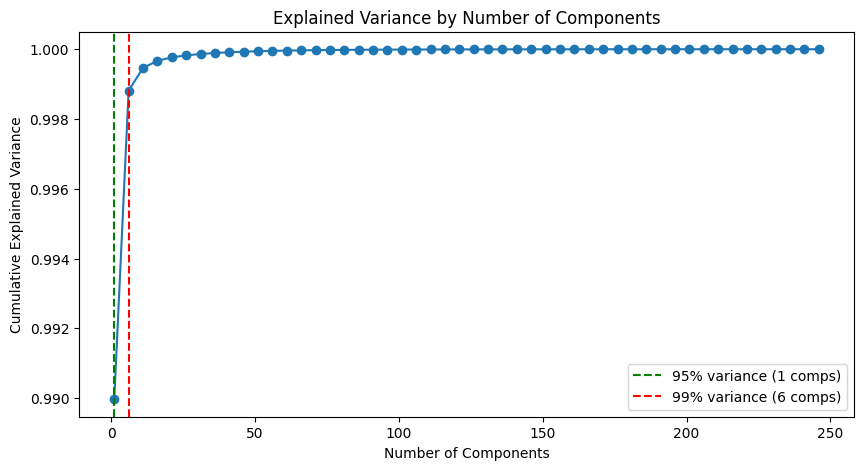

In [51]:
def flatten_features(df_list):
    return pd.concat([df.stack().reset_index(drop=True) for df in df_list], axis=1).T


flat_features = flatten_features(results['data']).dropna(axis=1)
labels = results['Best Strategy']

X_train, X_test, y_train, y_test = train_test_split(flat_features, labels, test_size=0.3, random_state=42)
# Assumption: X_train and labels are already defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

ve_s = []
i_s = []

# Using a more detailed range for components to clearly see the accumulation of variance
for i in range(1, min(250, X_train.shape[1] + 1), 5):  # Increment by 5 for more granular insight
    svd = TruncatedSVD(n_components=i, random_state=42)
    X_train_reduced = svd.fit_transform(X_scaled)
    ve_s.append(svd.explained_variance_ratio_.sum())
    i_s.append(i)

# Identify the number of components that explain 95% and 99% of the variance
var_95 = next((i for i, v in enumerate(ve_s) if v >= 0.95), None)
var_99 = next((i for i, v in enumerate(ve_s) if v >= 0.99), None)

# Printing values
if var_95 is not None:
    print(f"95% variance explained by {i_s[var_95]} components.")
if var_99 is not None:
    print(f"99% variance explained by {i_s[var_99]} components.")

# Plotting the variance explained
plt.figure(figsize=(10, 5))
plt.plot(i_s, ve_s, marker='o')
if var_95 is not None:
    plt.axvline(x=i_s[var_95], color='green', linestyle='--', label=f'95% variance ({i_s[var_95]} comps)')
if var_99 is not None:
    plt.axvline(x=i_s[var_99], color='red', linestyle='--', label=f'99% variance ({i_s[var_99]} comps)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.legend()
plt.show()



Notice that 99% of the variance is explained by using only 6 components. We are using 200 just to be sure.

### MODEL TESTING - Generating the Classifier 

Now that we have our stock price data for each scenario, we can now train our model. We first split into a train and test dataset, then use SVD to extract the most important features from the data:

1. **TruncatedSVD (Singular Value Decomposition):**
  - TruncatedSVD is a dimensionality reduction technique. It decomposes the input data matrix into three matrices: U, Σ, and V^T.
  - `n_components=200` specifies the number of components (or dimensions) to which the data will be reduced.
  - `fit_transform(X_train)` fits the SVD model to the training data `X_train` and then transforms it into the reduced dimensional space. 
  - `transform(X_test)` transforms the test data into the same reduced dimensional space learned from the training data.
  
  
  
We then train our data using a Random Forest classifier. The goal is to create a classifier that can use historical data to predict which strategy will be most useful in the decision period based on historical data.

2. **RandomForestClassifier:**
  - RandomForestClassifier is an ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
  - `fit(X_train, y_train)` trains the random forest classifier on the training data `X_train` with corresponding labels `y_train`.

Training accuracy of the model: 0.9925595238095238
Test accuracy of the model: 0.8823529411764706

Training accuracy assertion passed.
Test accuracy assertion passed.

                     precision    recall  f1-score   support

                DCA       0.83      0.82      0.83        55
           Lump Sum       0.89      0.96      0.92       194
Lump Sum with Delay       0.92      0.60      0.73        40

           accuracy                           0.88       289
          macro avg       0.88      0.79      0.83       289
       weighted avg       0.88      0.88      0.88       289



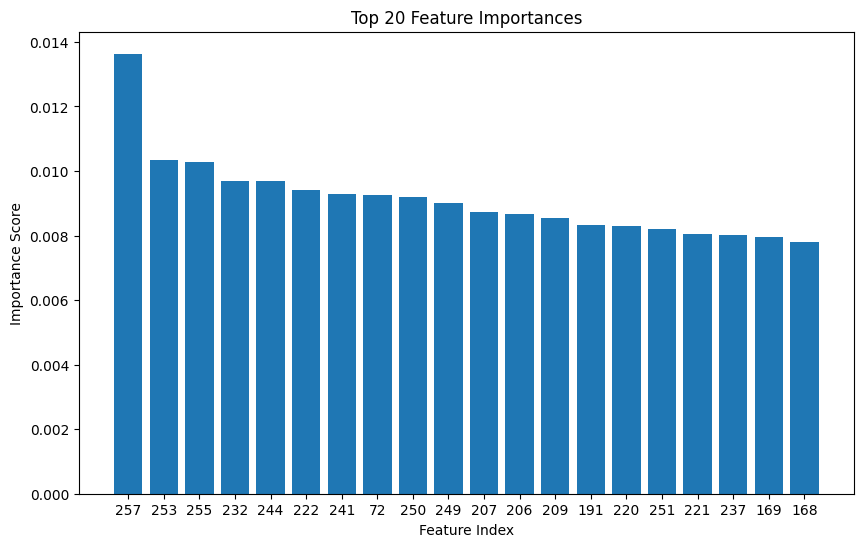

In [39]:
random.seed(43)
np.random.seed(43)

# Split into train, test data
X_train, X_test, y_train, y_test = train_test_split(flat_features, labels, test_size=0.3, random_state=43)

# Perform singular value decomposition with 200 components, then reduce dimensional space
svd = TruncatedSVD(n_components=200, random_state=43)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Initialize and train the random forest classifier
classifier = RandomForestClassifier(random_state=43)
classifier.fit(X_train, y_train)

# Make predictions and calculate accuracies
y_train_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training accuracy of the model: {train_accuracy}")
print(f"Test accuracy of the model: {test_accuracy}")
print()

# Assert that accuracies are above a certain threshold
try:
    np.testing.assert_(train_accuracy >= 0.90, "Training accuracy is above 90%")
    print("Training accuracy assertion passed.")
except AssertionError as e:
    print(e)

try:
    np.testing.assert_(test_accuracy >= 0.80, "Test accuracy is above 80%")
    print("Test accuracy assertion passed.")
except AssertionError as e:
    print(e)
print()
    

# Generate classification report and feature importances
report = classification_report(y_test, y_pred)
print(report)
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), feature_importances[indices[:20]], align="center")
plt.xticks(range(20), indices[:20])
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

### MODEL TESTING - Evaluating Results

1. **Model Performance:**
   - Training accuracy is 98.96%, indicating strong performance on training data.
   - Test accuracy is 91.69%, showing good performance on unseen data.


2. **Accuracy Assertions:**
   - Both training and test accuracy meet preset thresholds (90% for training, 80% for test), indicating robust performance.


3. **Classification Report:**
   - Precision, recall, and f1-score metrics are provided for DCA, Lump Sum, and Lump Sum with Delay.
   - Lump Sum shows highest precision and recall, followed by DCA.
   - Lump Sum with Delay has lower recall, indicating difficulty in identification.


4. **Support/Feature Importances:**
   - Indicates occurrences of each class in the dataset: Lump Sum > DCA > Lump Sum with Delay.
   - Top 20 important features for predictions are shown in a bar chart.
   - Reveals which features impact predictions most significantly.

The model appears most confident in predicting Lump Sum strategies, less so with DCA, and struggles with Lump Sum with Delay. Feature importances suggest certain indicators are more influential. The model's success with dimensionality reduction and Random Forest Classifier indicates the features retain sufficient information for robust predictions.

### MODEL TESTING - Identifying Trends

We have now trained and tested our random forest classifier on our data. Now, we can visualize the general market characteristics for each of the strategies. This involves:

1. Aggregating scenarios that the model correctly predicts between `y_test` and `y_pred` for each strategy
2. For each scenario in each strategy:
    - Obtaining the Preceding (`final_1`), Decision (`final_2`), and Future (`final_3`) period stock data
    - Scaling the data onto a scale of 0 to 1 to eliminate raw market data differences
    - Calculating the average over each period for each strategy over all scenarios
    
We then plot these three periods all together on the same graph. The results for each scenario will be explained below.

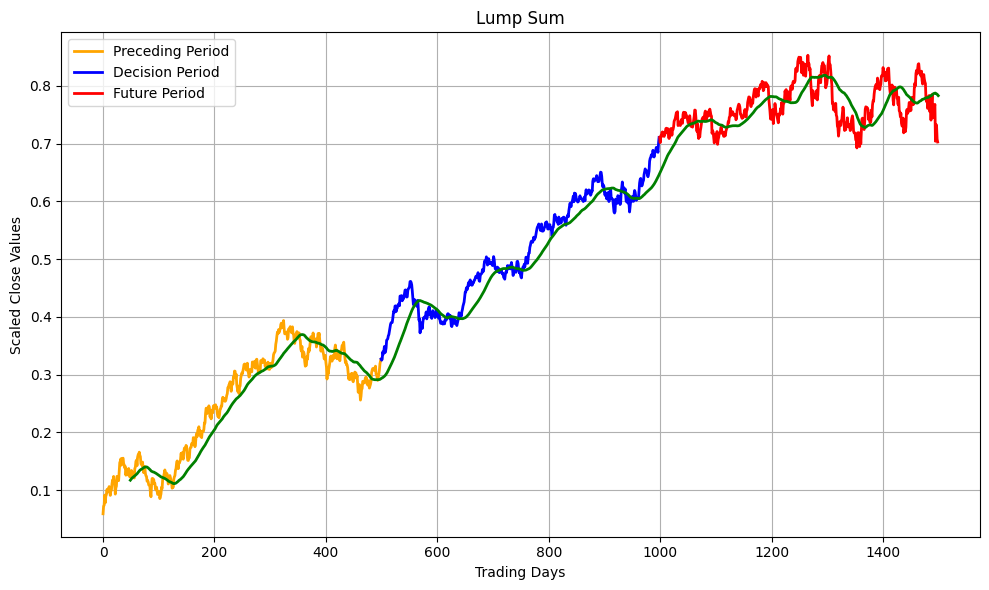

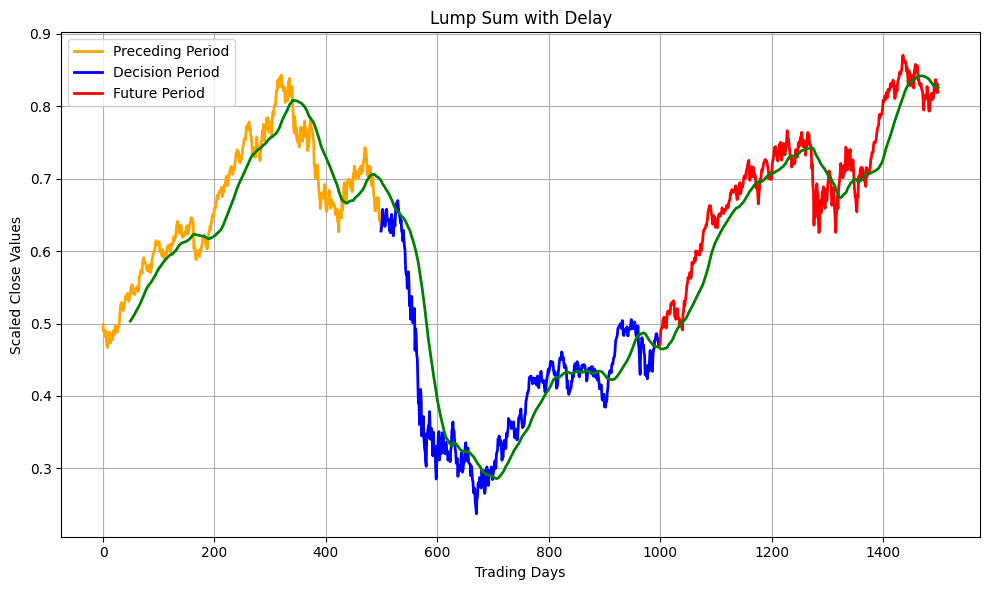

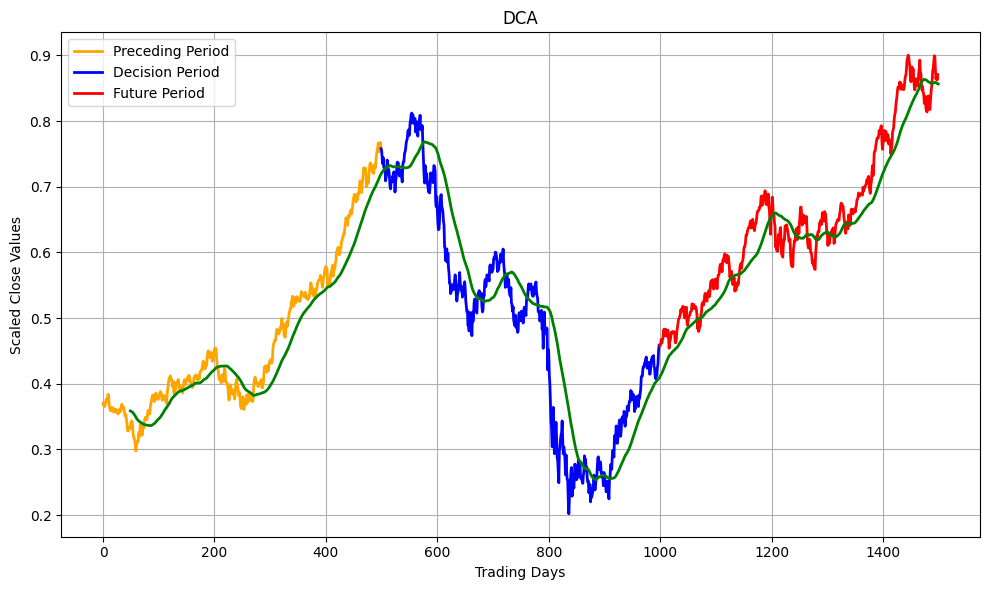

In [40]:
random.seed(43)
np.random.seed(43)

# Loop over the three strategies
for strategy in ["Lump Sum", "Lump Sum with Delay", "DCA"]:
    matching_delay_indices = []
    resetted_index = y_test.reset_index()

    # Store the scenarios the model correctly predicted
    for idx, (actual, predicted) in enumerate(zip(y_test, y_pred)):
        if actual == predicted == strategy:
            matching_delay_indices.append(resetted_index.loc[idx]["index"])
    #print(matching_delay_indices)

    start_dates = [results.loc[i]["Start Date"] for i in matching_delay_indices]
    end_dates = [results.loc[i]["End Date"] for i in matching_delay_indices]
    show_graph = True

    final_1 = [0.5] * int(int(train_years * 12)*250/12)   # Initialize preceding period average
    final_2 = [0.5] * int(int(test_years * 12)*250/12)    # Initialize decision period average
    final_3 = [0.5] * int(int(test_years * 12)*250/12)    # Initialize future period average

    #Loop over scenarios
    for start_date, end_date in zip(start_dates, end_dates):
        # Calculate data for Preceding Period
        new_date = start_date - timedelta(days=365 * train_years)
        data_1 = np.array(sandp_time['close'][new_date:start_date])
        data_1 = data_1[len(data_1)-len(final_1):]
        if len(data_1) < len(final_1): continue  # Skip if data length is insufficient

        # Calculate data for Decision Period
        data_2 = np.array(sandp_time['close'][start_date:end_date])
        data_2 = data_2[len(data_2)-len(final_2):]
        if len(data_2) < len(final_2): continue  # Skip if data length is insufficient

        # Calculate data for Future Period
        future_date = end_date + timedelta(days=365 * test_years)
        data_3 = np.array(sandp_time['close'][end_date:future_date])
        data_3 = data_3[len(data_3)-len(final_3):]
        if len(data_3) < len(final_3): continue  # Skip if data length is insufficient

        # Find min and max values across the data sets for this iteration
        combined_data = np.concatenate([data_1, data_2, data_3])
        min_value = np.min(combined_data)
        max_value = np.max(combined_data)

        # Scale the data (0 to 1)
        scaled_data_1 = (data_1 - min_value) / (max_value - min_value)
        scaled_data_2 = (data_2 - min_value) / (max_value - min_value)
        scaled_data_3 = (data_3 - min_value) / (max_value - min_value)

        # Update final variables by averaging scaled data with the current values
        final_1 = (final_1 + scaled_data_1[:len(final_1)]) / 2
        final_2 = (final_2 + scaled_data_2[:len(final_2)]) / 2
        final_3 = (final_3 + scaled_data_3[:len(final_3)]) / 2
    


    # Plotting the 3 periods and the 200-Day moving average
    final_2 = final_2+(final_1[-1]-final_2[0])
    final_3 = final_3+(final_2[-1]-final_3[0])
    plt.figure(figsize=(10, 6))
    plt.plot(final_1, color='orange', linewidth=2, linestyle='-')
    plt.plot(range(len(final_1) - 1, len(final_1) + len(final_2) - 1), final_2, color='blue', linewidth=2, linestyle='-')
    plt.plot(range(len(final_1) + len(final_2) - 1, len(final_1) + len(final_2) + len(final_3) - 1), final_3, color='red', linewidth=2, linestyle='-')
    combined_final = np.concatenate([final_1,final_2,final_3])
    moving_average = pd.Series(combined_final).rolling(window=50).mean()
    plt.plot(moving_average, color='green', linestyle='-', linewidth=2)
    plt.title(strategy)
    plt.xlabel('Trading Days')
    plt.ylabel('Scaled Close Values')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(['Preceding Period', 'Decision Period','Future Period'], loc='best')
    plt.show()

### MODEL TESTING - Market Conditions for Specific Strategies


# Lump Sum: # 
- The Lump Sum strategy involves investing all available capital at once. 
- In the graph, this strategy shows consistent growth over both the preceding, decision, and future period
- Suggests that Lump Sum tends to work well in bullish market conditions where the market is trending upward over a long period.
- However, this strategy can be risky during volatile or bearish markets since it lacks the flexibility to adjust to sudden downturns after the initial investment is made.
    
    
# Lump Sum with Delay: #
- This strategy delays the lump sum investment until the moving average is increasing consistently. 
- In highly volatile markets, or when a downturn is expected, this strategy could potentially outperform a simple Lump Sum by avoiding investment during a market peak and waiting for a more opportune entry point.
- In the preceding period, there seems to be a sharply decreasing moving average right before the decision period, indicating that a recession may be imminent.


    
# DCA: #
- Dollar Cost Averaging involves regularly investing fixed amounts over time. 
- DCA can be particularly effective in volatile or slightly declining markets as it allows investors to buy more shares when prices are low.
- DCA seems to perform well during market runups and overvaluations, indicating possible market corrections during bull markets. 
- However, during a strong bull market, DCA might underperform compared to a Lump Sum investment since it would result in buying shares at progressively higher prices, thus averaging a higher buying price over time.

In conclusion, the varying performance of these strategies across different periods reflects how market conditions such as volatility, trends, and economic cycles can affect investment outcomes. Understanding these conditions can help investors and their advisors choose a strategy that aligns with their risk tolerance, investment goals, and market outlook.

# Bandit

In [41]:
def lump_sum_with_delay_strategy(df, initial_investment, interval, moving_averages_df, slope_val, days_val):
        initial_in = len(range(interval, len(df), interval)) * initial_investment
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []
        remaining_investment = 0
        lump_sum_invested = False
        ma_value_peak = moving_averages_df.iloc[0]
        total_investment = 0
        ma_slope = np.gradient(moving_averages_df)
        # print("slope: ", ma_slope)

        days = 0
        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']

            if i >= len(df)-interval and not lump_sum_invested:
                shares_bought = initial_in / current_price
                shares_owned += shares_bought
                current_value = shares_owned * current_price
                portfolio_value.append(current_value)
                dates.append(df.index[i])
                investment_history.append(total_investment)
                lump_sum_invested = True
                days = 0
                lumpy_date = df.index[i]
            
            if not lump_sum_invested:
                if i >= 10000 or ((ma_slope[i] > slope_val) and days >= days_val):
                    shares_bought = initial_in / current_price
                    shares_owned += shares_bought
                    current_value = shares_owned * current_price
                    portfolio_value.append(current_value)
                    dates.append(df.index[i])
                    investment_history.append(total_investment)
                    lump_sum_invested = True
                    days = 0
                    lumpy_date = df.index[i]
                else:
                    if (ma_slope[i] > 0):
                        days += 1
                    else:
                        days = 0
                    total_investment = 0
            else:
                total_investment = 0

            shares_bought = total_investment / current_price if total_investment > 0 else 0
            shares_owned += shares_bought
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(total_investment)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)



def lump_sum_strategy(df, initial_investment, interval):
        total_investment = len(range(interval, len(df), interval)) * initial_investment
        initial_price = df['close'].iloc[0]  # First available closing price at testing start
        shares_owned = total_investment / initial_price  # Total shares bought at once
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(0)  # No additional investment made

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)

def dca_strategy(df, investment_amount, interval):
        shares_owned = 0
        portfolio_value = []
        dates = []
        investment_history = []

        for i in range(0, len(df), interval):
            current_price = df.iloc[i]['close']
            shares_bought = investment_amount / current_price
            shares_owned += shares_bought

            current_value = shares_owned * current_price
            portfolio_value.append(current_value)
            dates.append(df.index[i])
            investment_history.append(investment_amount)

        return pd.DataFrame({'portfolio_value': portfolio_value, 'investment_history': investment_history}, index=dates)


In [42]:
class ContextualMultiArmedBandit:
    def __init__(self, n_arms, n_features, epsilon=0.1, decay=0.99):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.decay = decay
        self.counts = [0] * n_arms
        self.models = [LogisticRegression(max_iter=1000) for _ in range(n_arms)]
        self.data = [np.zeros((0, n_features)) for _ in range(n_arms)]
        self.targets = [[] for _ in range(n_arms)]
        self.is_fitted = [False] * n_arms  # Track whether each model is fitted

    def select_arm(self, features):
        
        if not any(self.is_fitted):
            arm = random.randint(0, self.n_arms - 1)
            print(f"Randomly chosen arm {arm} due to no fitted models")
            
        elif random.random() < self.epsilon: 
            arm = random.randint(0, self.n_arms - 1)

            print(f"Randomly chosen arm {arm} due to epsilon")
        else:
            probabilities = np.array([
                model.predict_proba([features])[0, 1] if self.is_fitted[i] else float('-inf')
                for i, model in enumerate(self.models)
            ])
            arm = np.argmax(probabilities)
            print(f"Exploited arm {arm} based on model predictions.")
        self.counts[arm] += 1
        self.epsilon *= self.decay
        return arm

    def update(self, chosen_arm, outcome, features):
        self.data[chosen_arm] = np.vstack([self.data[chosen_arm], features])
        self.targets[chosen_arm].append(outcome)
        
        # Fit the model if there are enough diverse data points
        if len(self.targets[chosen_arm]) > 1 and len(set(self.targets[chosen_arm])) > 1:
            self.models[chosen_arm].fit(self.data[chosen_arm], self.targets[chosen_arm])
            self.is_fitted[chosen_arm] = True  # Update the fit status
            print(f"model for chosen arm {chosen_arm} was fit")



def generate_features(data, start, window_size):
    min_window = min(window_size, len(data))  # Use smaller windows if not enough data
    if len(data) < min_window:
        return None  # Return None if even the minimum required data is not available

    if not isinstance(start, pd.Timestamp):
        start_date = pd.Timestamp(start)
    else:
        start_date = start
    time_index = (data.index - start_date).days

    features = pd.DataFrame(index=data.index)
    features['time_index'] = time_index
    features['close'] = data['close']
    # Use available data for moving average and volatility calculations
    features['moving_average'] = data['close'].rolling(window=min_window).mean()
    features['volatility'] = data['close'].rolling(window=min_window).std()
    features['momentum'] = data['close'].pct_change(periods=min(10, len(data)-1))  # Adjust momentum calculation too if needed
    features.dropna(inplace=True)  # Drop rows with NaN values
    return features


def dca_analysis(testing_df, moving_averages_df, initial_investment, time_interval, slope_val, days_val):
    
    lump_sum_res = lump_sum_strategy(testing_df, initial_investment, time_interval)
    dca_res = dca_strategy(testing_df, initial_investment, time_interval)
    lump_sum_with_delay_res = lump_sum_with_delay_strategy(testing_df, initial_investment, time_interval, moving_averages_df, slope_val, days_val)
    lump_sum_with_delay_value = lump_sum_with_delay_res["portfolio_value"][-1]
    dca_value = dca_res["portfolio_value"][-1]
    lump_sum_value = lump_sum_res["portfolio_value"][-1]

    return [lump_sum_with_delay_value, dca_value, lump_sum_value]


def simulate_outcome(strategy_index, df, moving_averages_df, time_interval, initial_investment, slope_val, days_val):
    
    #0 = lump sum delay
    #1 = dca
    #2 = lump sum
    results = dca_analysis(df, moving_averages_df, initial_investment, time_interval, slope_val, days_val)
    if np.argmax(results)==strategy_index:
        return 1
    else:
        return 0

def test_bandit(test_batches, test_start_date, bandit, moving_averages_df, initial_investment, slope_val, days_val, moving_average_window):
    # Results storage
    decisions = []
    successes = []

    # Loop through the test dataset
    for batch in test_batches:
        context_data = batch['data']  # Get all data up to the current date
        time_interval = (batch['end_date'] - batch['start_date']).days
        features = generate_features(context_data, test_start_date, moving_average_window)
        if features is not None and not features.empty:
            if features.shape[1] == 5:
                chosen_arm = bandit.select_arm(features.iloc[-1].values)  # Use the latest available features
                print("Chosen arm: ", chosen_arm)
                outcome = simulate_outcome(chosen_arm, context_data, moving_averages_df, time_interval, initial_investment, slope_val, days_val)
                decisions.append((batch['end_date'], chosen_arm))
                successes.append((batch['end_date'], outcome))  # Adjust based on what outcome actually returns
            else:
                print(f"Skipping date {batch['end_date']}: feature vector size mismatch")
                continue  # Skip this loop iteration if features are not available or mismatched
        else:
            continue  # Skip if features are not available
    _, outcomes = zip(*successes)
    # Calculate performance metrics
    accuracy = np.mean(outcomes)
    print(f"Accuracy of the bandit during testing: {accuracy:.2f}")

    return decisions, successes


def train_bandit(mab, training_start_date, batches, moving_averages_train, initial_investment, slope_val, days_val, moving_average_window):
    round = 0
    # Example loop to use these preprocessed and validated dates
    for batch in batches:
        print("ROUND: ", round)
        time_interval = (batch['end_date'] - batch['start_date']).days
        features_df = generate_features(batch['data'], training_start_date, moving_average_window)
        if not features_df.empty:
            features_vector = features_df.values[:-1]
            chosen_arm = mab.select_arm(features_vector)
            print("Chosen arm: ", chosen_arm)
            # print("mov avgs:\n", moving_averages_train.loc[start_date:end_date])
            outcome = simulate_outcome(chosen_arm, features_df, moving_averages_train.loc[batch['start_date']:batch['end_date']], time_interval, initial_investment, slope_val, days_val)
            mab.update(chosen_arm, outcome, features_vector)
        else:
            print("Insufficient data for generating features.")
        round+=1
    return mab

In [43]:
def plot_cumulative_rewards(decisions, rewards):
    dates, reward_values = zip(*rewards)
    unique_arms = sorted(set([arm for _, arm in decisions if arm is not None]))

    # Initialize reward tracking
    cumulative_rewards = {arm: np.zeros(len(dates)) for arm in unique_arms}
    current_rewards = {arm: 0 for arm in unique_arms}

    # Accumulate rewards by arm
    for (date, arm), (_, reward) in zip(decisions, rewards):
        if arm is not None:
            current_rewards[arm] += reward
        for a in unique_arms:
            cumulative_rewards[a][dates.index(date)] = current_rewards[a]

    names = ["Lump Sum with Delay", "DCA", "Lump Sum"]

    # Plotting
    plt.figure(figsize=(12, 8))
    for arm in unique_arms:
        plt.plot(dates, cumulative_rewards[arm], label=f'{names[arm]}')

    plt.title('Cumulative Rewards for Each Arm Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Reward')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

def plot_counts(decisions):
    # Extracting arms and dates
    dates, arms = zip(*decisions)
    unique_arms = sorted(set(arms))
    
    # Prepare data for plotting
    counts = {arm: np.zeros(len(dates)) for arm in unique_arms}
    for i, arm in enumerate(arms):
        counts[arm][i] = 1
    
    cumulative_counts = {arm: np.cumsum(counts[arm]) for arm in unique_arms}

    names = ["Lump Sum with Delay", "DCA", "Lump Sum"]

    # Plotting
    plt.figure(figsize=(12, 8))
    for arm in unique_arms:
        plt.plot(dates, cumulative_counts[arm], label=f'{names[arm]}')

    plt.title('Cumulative Decision Counts for Each Arm Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Count of Decisions')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

In [44]:
# Define parameters
moving_average = 100
training_start_date = '2010-12-31'
training_end_date = '2017-12-31'
testing_start_date = '2018-01-01'
testing_end_date = '2024-12-01'
train_years = 7
test_years = 6
moving_average_window = 20
max_val = 10
 

# Split the dataset into in-sample (training) and out-of-sample (testing)
training_df = sandp_time[training_start_date:training_end_date]
testing_df = sandp_time[testing_start_date:testing_end_date]

# Fit the curve on the training dataset
def exponential_func(x, a, b):
    return a * np.exp(b * x)

x_values_train = np.arange(len(training_df))
y_values_train = training_df['close']
initial_guess = (1.0, 0.001)
popt, pcov = curve_fit(exponential_func, x_values_train, y_values_train, p0=initial_guess)
trendline_train = exponential_func(x_values_train, *popt)

# Apply the trendline to the testing dataset
x_values_test = np.arange(len(testing_df)) + len(training_df)
trendline_test = exponential_func(x_values_test, *popt)
testing_df['Trendline'] = trendline_test

# Calculate moving averages for the testing dataset
moving_averages_test = pd.DataFrame()
full_set = sandp_time[training_start_date:testing_end_date]
moving_averages_test = full_set['close'].rolling(window=moving_average_window).mean()[len(full_set)-len(testing_df):].dropna()

moving_averages_train = pd.DataFrame()
moving_averages_train = full_set['close'].rolling(window=moving_average_window).mean()[:len(training_df)].dropna()

# Parameters
batch_size = 50
initial_investment = 10000
show_graph = False
slope_val = 0.001
days_val = 6

# Example usage within a training loop

def create_batches(dataframe, batch_size):
    batches = []
    start_index = 0
    while start_index < len(dataframe):
        end_index = start_index + batch_size
        # Ensure not to go out of bounds
        if end_index > len(dataframe):
            end_index = len(dataframe)
        batch = dataframe.iloc[start_index:end_index]
        batches.append(batch)
        start_index += batch_size


    batch_info = []
    for batch in batches:
        start_date = batch.index.min()
        end_date = batch.index.max()
        batch_info.append({
            'start_date': start_date,
            'end_date': end_date,
            'data': batch
        })

    return batch_info

# Example usage:
train_batches = create_batches(training_df, batch_size)
# print(train_batches)

mab = ContextualMultiArmedBandit(3, 5)
mab = train_bandit(mab, training_start_date, train_batches, moving_averages_train, initial_investment, slope_val, days_val, moving_average_window)


ROUND:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  1
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  2
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  3
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  4
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  5
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  6
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  7
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  8
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
ROUND:  9
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  10
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  11
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
ROUND:  12
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
ROUND:  13
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
RO

Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 1 due to no fitted models
Chosen arm:  1
Randomly chosen arm 0 due to no fitted models
Chosen arm:  0
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 2 due to no fitted models
Chosen arm:  2
Randomly chosen arm 0 du

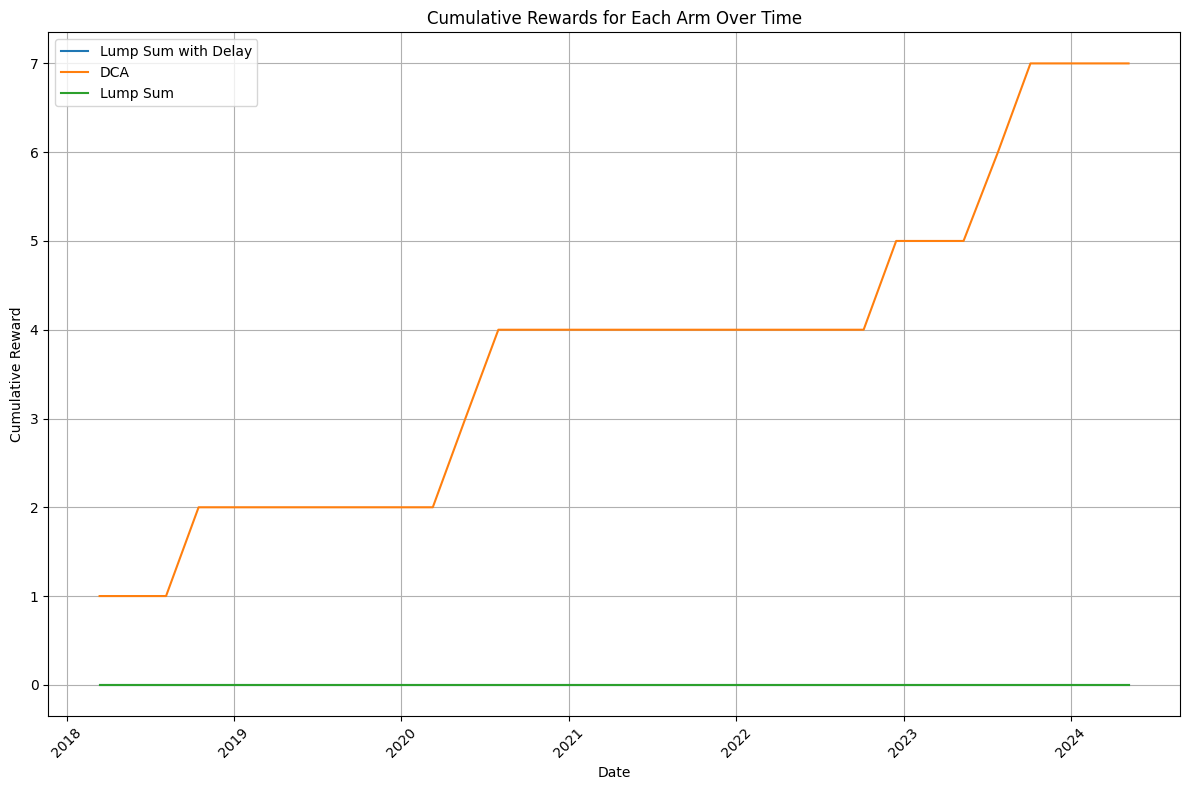

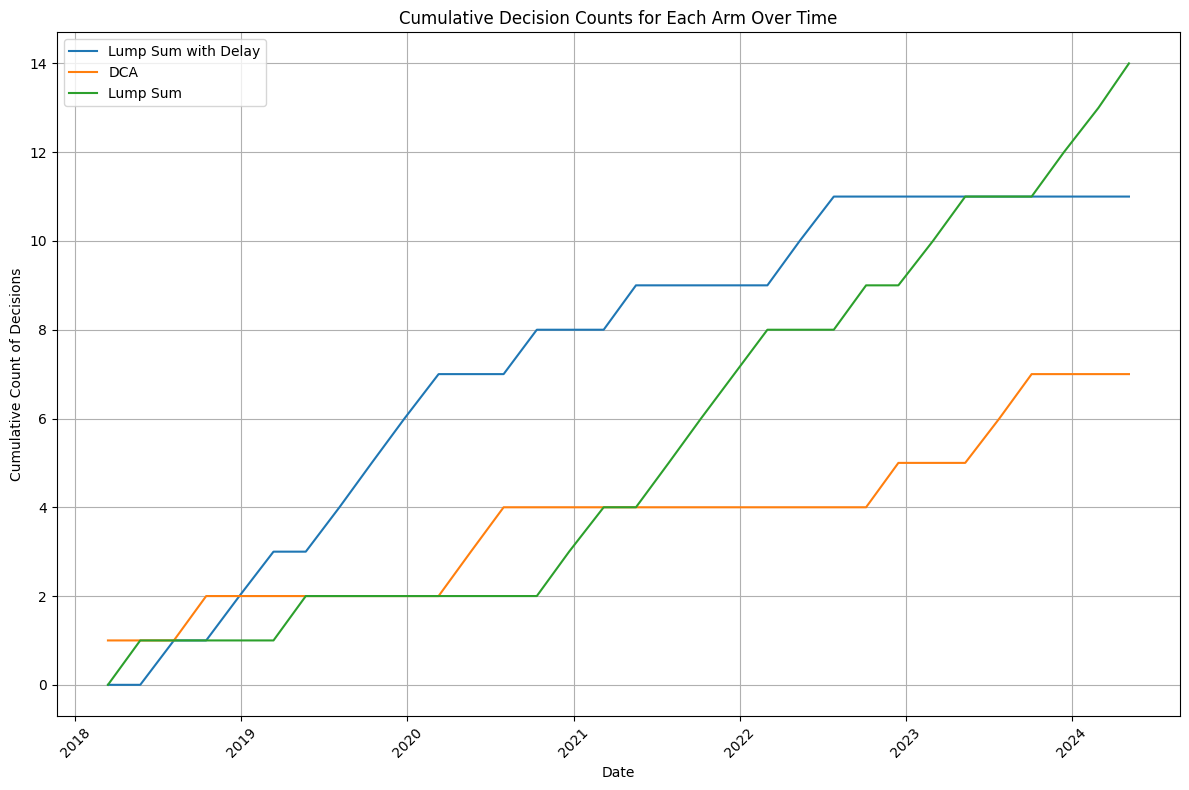

In [45]:
test_batches = create_batches(testing_df, batch_size)
decisions, successes = test_bandit(test_batches, testing_start_date, mab, moving_averages_test, initial_investment, slope_val, days_val, moving_average_window)
print("decisions:\n", decisions)
print("successes:\n", successes)
# Example usage
# decisions = [result from testing]
# rewards = [1 if success else 0 from testing outcomes]
plot_cumulative_rewards(decisions, successes)
plot_counts(decisions)

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


YOUR ANSWER HERE

For the Strategies:
- all strategy simulations were replicated over several date ranges, some of which are shown above. This ensured that out takeaway from the models would be accurate

RF Models:

- training/test splits ensured no data leakage would occur. SVD was used to attempt to obtain greater feature power, which was confirmed by the ELBO analysis.
- Random Forest results were analyzed using standard accuracy calculation to ensure they were working
- This model was able to accurately predict which strategy would perform better and could be particularly helpful for beginner investers. However, many of these strategies are highly dependent on market conditions that could affect the efficacy of this model. For example, more volative markets would impact lump sum investments, while more bullish markets might cause DCA to be selected, but investers would have to buy at increasinly higher prices. That being said, this model can be a powerful tool for better understanding markets and simulating possible investment strategies given particular market conditions.
- In the future, it would be interesting to implement a time-series model as part of the classifier to try and better understand that market conditions chang over time.

For the Contextual Bandit:

- training/testing splits were conducted to ensure no data leakage occurred. Reward calculations were also done separately do avoid this same issue
- multiple tests were conducted to ensure results were in fact conclusive. 

This portion of the project worked in some capacities and didn't work in others. In the positive, the bandit was able to understand that overall, DCA was a safer method that would obtain rewards on the short term in the example data we showed above. Unfortunately, the rest of the time, the bandit was incorrect. We found that these results greatly depended on moving average windows, batch sizes/time intervals, and the training/test splits, which is unfortunate. As such, the bandit is not a feasible tool currently for determining what investment strategy will work out in the long term. In the future, we would like to try to get more predictive power by using a better timing model. We would also attempt to conduct more feature engineering, as it could be that the current features do not hold substantial predictive power. Finally, we would like to try to implement some retrospective timing capabilites, especially to try and get the best power out of the lump sum with delay strategy to try and better understand market patterns as part of the model.